# Tutorial

Make sure to install the `curvature` package first by running

```shell
python setup.py install
```

inside of the `curvature` repo.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from pandas import pivot_table
import os
import seaborn as sns

import curvature

%matplotlib inline

## Writing Data
First, write the data. Just using the same sample image repeatedly for a few different dates.

In [47]:
for i in os.listdir('../data'):
    if not i.startswith('.'):
        path = '../data/' + i
        md = i.split('_')
        metadata = {
            'cylinder_radius':md[0],
            'pitch':md[1],
            'coil':md[2],
            'thickness':md[3],
            'width':md[4],
            'E_value':md[5],
            'A_value':md[6][:-4]
        }
        curvature.commit_image('lce_curvature_dbase.h5',path,
                           np.array([0,50,100]),9.525,metadata,date='11 06 2017')
        

In [7]:
metadata = {
    'cylinder_radius':5,
    'pitch':0.1,
    'thickness':1,
    'width':7,
    'E_value':0.01,
    'A_value':9,
    'coil':0.5
}

In [55]:
curvature.commit_image('lce_curvature_dbase.h5','../data/small_r_05_340_2_E35_A5.jpg',
            np.array([100,50,0]),9.5,metadata,date='11 07 2017')


For a large batch of images, just use `os.path.listdir` to list all of the images in the directory and adjust the metadata and date accordingly. 

## Interface
Create an `LCEImage` object using the name of the hdf5 file.

In [44]:
lceimage = curvature.LCEImage('lce_curvature_dbase.h5')

In [48]:
lceimage

/
Datasets
--------
10_31_16
11_06_16
11_06_17
12_01_17

Attributes
----------


Access individual days by index or date.

In [56]:
lceimage['11_07_17']

//11_07_17
Datasets
--------
0

Attributes
----------


In [14]:
lceimage[1]

//11_06_17
Datasets
--------
0

Attributes
----------


Or iterate through days

In [15]:
for day in lceimage:
    print(day)

//10_31_16
Datasets
--------
0
1
2

Attributes
----------


//11_06_17
Datasets
--------
0

Attributes
----------


//12_01_17
Datasets
--------
0
1

Attributes
----------




Similarly for the images in the day.

In [16]:
lceimage[0][0]

//10_31_16/0
Datasets
--------
image
physical_radii
strain
x_center
y_center

Attributes
----------
cylinder_radius
pitch
thickness
width
E_value
A_value
coil
physical_conversion
x_center_scale
y_center_scale
physical_radius_scale

In [18]:
for image in lceimage[0]:
    print(image['strain'])

[  0  50 100]
[  0  50 100]
[  0  50 100]


## Plot
Quick plot to show the contours. Use the `save2file` keyword to save the image.

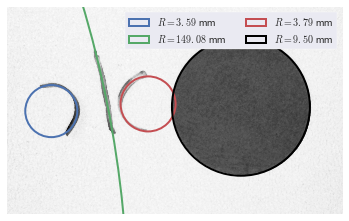

In [57]:
for i,image in enumerate(lceimage['11_07_17']):
    image.peek(save2file='../tmp_plots/{}_plot.png'.format(i))

## Export to Pandas
Convert individual images to dataframes or convert whole days or all days.

In [23]:
lceimage[0][0].to_dataframe()

,A_value,E_value,coil,cylinder_radius,date,physical_conversion,physical_radii,physical_radius_scale,pitch,strain,thickness,width,x_center_scale,y_center_scale
0,9,0.01,0.5,5,2016-10-31,0.011598,1.133414,3.0,0.1,0,1,7,876.268487,373.997645
1,9,0.01,0.5,5,2016-10-31,0.011598,47.077844,3.0,0.1,50,1,7,876.268487,373.997645
2,9,0.01,0.5,5,2016-10-31,0.011598,1.197809,3.0,0.1,100,1,7,876.268487,373.997645


In [81]:
df = lceimage['10_31_16'].to_dataframe()

df['fixity'] = df['physical_radii']/df['cylinder_radius']
#table = pivot_table(df, values='physical_radii', index=['strain'],columns=['thickness'], aggfunc=np.sum)
#df.pivot("strain","thickness","physical_radii")
#table

df

,index,A_value,E_value,coil,cylinder_radius,date,physical_conversion,physical_radii,physical_radius_scale,pitch,strain,thickness,width,x_center_scale,y_center_scale,fixity
0,0,9,0.01,0.5,5,2016-10-31,0.011598,1.133414,3.0,0.1,0,1,7,876.268487,373.997645,0.226683
1,1,9,0.01,0.5,5,2016-10-31,0.011598,47.077844,3.0,0.1,50,1,7,876.268487,373.997645,9.415569
2,2,9,0.01,0.5,5,2016-10-31,0.011598,1.197809,3.0,0.1,100,1,7,876.268487,373.997645,0.239562
3,0,9,0.01,0.5,5,2016-10-31,0.011598,1.133414,3.0,0.1,0,1,7,876.268487,373.997645,0.226683
4,1,9,0.01,0.5,5,2016-10-31,0.011598,47.077844,3.0,0.1,50,1,7,876.268487,373.997645,9.415569
5,2,9,0.01,0.5,5,2016-10-31,0.011598,1.197809,3.0,0.1,100,1,7,876.268487,373.997645,0.239562
6,0,9,0.01,0.5,5,2016-10-31,0.011598,1.133414,3.0,0.1,0,1,7,876.268487,373.997645,0.226683
7,1,9,0.01,0.5,5,2016-10-31,0.011598,47.077844,3.0,0.1,50,1,7,876.268487,373.997645,9.415569
8,2,9,0.01,0.5,5,2016-10-31,0.011598,1.197809,3.0,0.1,100,1,7,876.268487,373.997645,0.239562


In [74]:
sns.cubehelix_palette(start=.5, rot=-.75,as_cmap=True)

In [58]:
lceimage.to_dataframe()

ValueError: arrays must all be same length